Siddhant Ashwani






BL.EN.U4CSE21189

A1.Develop the above perceptronin your own code (don’t use the perceptron model available from package). Use the initial weights as provided below. W0 = 10, W1 = 0.2, w2 = -0.75, learning rate (α) = 0.05Use Stepactivation function to learn the weights of the network to implement above provided AND gate logic. The activation function is demonstratedbelow.Identify the number of epochs needed for the weights to converge in the learning process. Make a plot of the epochs against the error values calculated (after each epoch, calculate the sum-square-error against all training samples). (Note: Learning is said to be converged if the error is less than or equal to 0.002. Stop the learning after 1000 iterations if the convergence error condition is not met)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

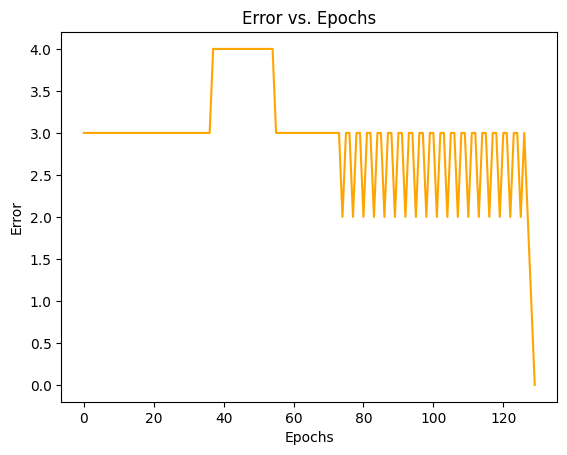

Number of epochs needed for convergence: 130
Final weights: w0 = -0.10000000000000765, w1 = 0.1000000000000001, w2 = 0.05000000000000032


In [3]:
def PerceptronForAndGate(initialW, learningR=0.05, convergenceErr=0.002, maxEpoch=1000):
    # Initialize the weights and bias
    w0, w1, w2 = initialW

    # Step activation function
    def stepActivation(x):
        return 1 if x >= 0 else 0

    # Calculating output of perceptron
    def perceptronOutput(x1, x2):
        return w0 + w1 * x1 + w2 * x2

    # Training data
    trainingData = [
        (0, 0, 0),
        (0, 1, 0),
        (1, 0, 0),
        (1, 1, 1)
    ]

    # Training loop
    epochs = 0
    errors = []

    while True:
        epoch_error = 0
        for x1, x2, target in trainingData:
            output = perceptronOutput(x1, x2)
            error = target - stepActivation(output)
            epoch_error = epoch_error + error ** 2
            w0 = w0 + learningR * error
            w1 = w1 + learningR * error * x1
            w2 = w2 + learningR * error * x2

        errors.append(epoch_error)
        epochs += 1

        if epoch_error <= convergenceErr or epochs >= maxEpoch:
            break

    return epochs, [w0, w1, w2], errors

# Providing Initial weights
InitialWeights = [10, 0.2, -0.75]

# Train the perceptron
num_epochs, final_weights, error_history = PerceptronForAndGate(InitialWeights)

# Plotting epochs against error values
plt.plot(range(num_epochs), error_history, color='orange')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()
print(f"Number of epochs needed for convergence: {num_epochs}")
print(f"Final weights: w0 = {final_weights[0]}, w1 = {final_weights[1]}, w2 = {final_weights[2]}")


A2. Repeat the above A1 experiment with following activation functions. Compare the iterations taken to converge against each of the activation functions. Keep the learning rate same as A1.

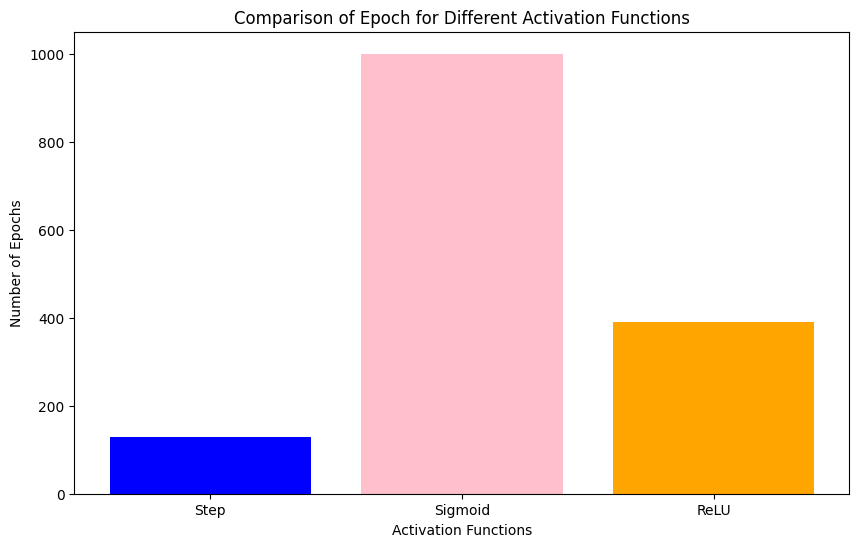

Activation Function: Step
Number of Epochs: 130
Final Weights: w0 = -0.10000000000000765, w1 = 0.1000000000000001, w2 = 0.05000000000000032

Activation Function: Sigmoid
Number of Epochs: 1000
Final Weights: w0 = -6.1353130787344305, w1 = 3.970833206406072, w2 = 3.963948347259991

Activation Function: ReLU
Number of Epochs: 390
Final Weights: w0 = -0.9277447198109581, w1 = 0.9511600082912268, w2 = 0.9498108559260638



In [4]:
def step_activation(x):
    return 1 if x >= 0 else 0

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

def train_perceptron(initialW, learningR=0.05, activation_func=step_activation, convergenceErr=0.002, max_epoch=1000):
    w0, w1, w2 = initial_weights

    def perceptron_output(x1, x2):
        return w0 + w1 * x1 + w2 * x2

    training_data = [
        (0, 0, 0),
        (0, 1, 0),
        (1, 0, 0),
        (1, 1, 1)
    ]

    epochs = 0
    errors = []

    while True:
        epoch_error = 0
        for x1, x2, target in training_data:
            output = perceptron_output(x1, x2)
            error = target - activation_func(output)
            epoch_error = epoch_error + error ** 2
            w0 = w0 + learningR * error
            w1 = w1 + learningR * error * x1
            w2 = w2 + learningR * error * x2
        errors.append(epoch_error)
        epochs += 1

        if epoch_error <= convergenceErr or epochs >= max_epoch:
            break

    return epochs, [w0, w1, w2], errors

# Initial weights
initial_weights = [10, 0.2, -0.75]

# Train the perceptron with different activation functions
activation_functions = [step_activation, sigmoid_activation, relu_activation]
activation_names = ["Step", "Sigmoid", "ReLU"]

num_epochs_list = []
final_weights_list = []
for activation_func in activation_functions:
    num_epochs, final_weights, _ = train_perceptron(initial_weights, activation_func=activation_func)
    num_epochs_list.append(num_epochs)
    final_weights_list.append(final_weights)

# Plotting epochs vs. activation functions
plt.figure(figsize=(10, 6))
plt.bar(activation_names, num_epochs_list, color=['blue', 'pink', 'orange'])
plt.xlabel('Activation Functions')
plt.ylabel('Number of Epochs')
plt.title('Comparison of Epoch for Different Activation Functions')
plt.show()

# Print the number of epochs and final weights for each activation function
for i, activation_name in enumerate(activation_names):
    print(f"Activation Function: {activation_name}")
    print(f"Number of Epochs: {num_epochs_list[i]}")
    print(f"Final Weights: w0 = {final_weights_list[i][0]}, w1 = {final_weights_list[i][1]}, w2 = {final_weights_list[i][2]}\n")


A3. Repeat exercise A1 with varying the learning rate, keeping the initial weights same. Take learning rate = {0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}. Make a plot of the number of iterations taken for learning to converge against the learning rates.

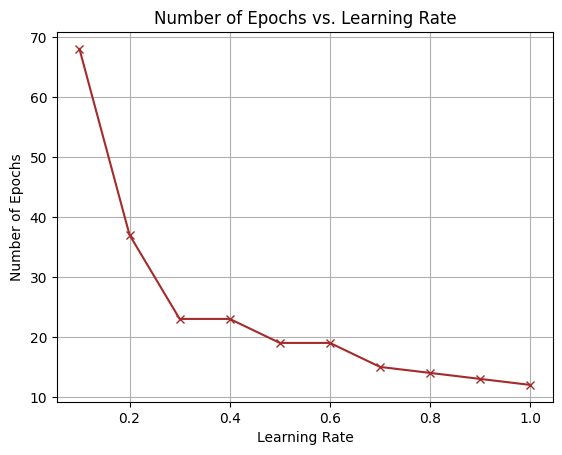

In [ ]:
def step_activation(x):
    return 1 if x >= 0 else 0

def train_perceptron(initial_weights, learningRate=0.05, activation_func=step_activation, convergence_error=0.002, max_epochs=1000):
    W0, W1, W2 = initial_weights

    def perceptron_output(x1, x2):
        return W0 + W1 * x1 + W2 * x2

    #and gate logic
    training_data = [
        (0, 0, 0),
        (0, 1, 0),
        (1, 0, 0),
        (1, 1, 1)
    ]

    epochs = 0
    errors = []

    while True:
        epoch_error = 0
        for x1, x2, target in training_data:
            output = perceptron_output(x1, x2)
            error = target - activation_func(output)
            epoch_error = epoch_error + error ** 2
            W0 = W0 + learningRate * error
            W1 = W1 + learningRate * error * x1
            W2 = W2 + learningRate * error * x2

        errors.append(epoch_error)
        epochs += 1

        if epoch_error <= convergence_error or epochs >= max_epochs:
            break

    return epochs, [W0, W1, W2], errors

# Initial weights
initial_weights = [10, 0.2, -0.75]

# List of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# List to store the number of epochs for each learning rate
num_epochs_list = []

# Train the perceptron with varying learning rates
for learning_rate in learning_rates:
    num_epochs, final_weights, errors = train_perceptron(initial_weights, learningRate=learning_rate)
    num_epochs_list.append(num_epochs)

# Plotting learning rates vs. number of epochs
plt.plot(learning_rates, num_epochs_list, marker='x', linestyle='-', color='brown')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs')
plt.title('Number of Epochs vs. Learning Rate')
plt.grid(True)
plt.show()

A4. Repeat the above exercises, A1 to A3,for XOR gate logic

A1 using XOR gate logic

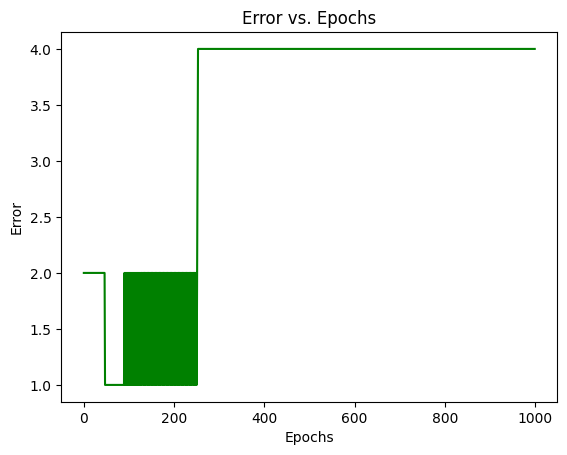

Number of epochs needed for convergence: 1000
Final weights: W0 = 0.09999999999999236, W1 = -0.09999999999999969, W2 = -0.09999999999999969


In [ ]:
def train_perceptron_for_and_gate(initialWeights, learningRate=0.05, convergenceError=0.002, maxEpochs=1000):
    # Initialize weights and bias
    W0, W1, W2 = initialWeights

    # Step activation function
    def stepActivation(x):
        return 1 if x >= 0 else 0

    # Perceptron output calculation
    def perceptronOutput(x1, x2):
        return W0 + W1 * x1 + W2 * x2

    # XOR gate training data
    trainingData = [
        (0, 0, 0),
        (0, 1, 1),
        (1, 0, 1),
        (1, 1, 0)
    ]

    # Training loop
    epochs = 0
    errors = []

    while True:
        epoch_error = 0
        for x1, x2, target in trainingData:
            output = perceptronOutput(x1, x2)
            error = target - stepActivation(output)
            epoch_error = epoch_error + error ** 2
            W0 = W0 + learningRate * error
            W1 = W1 + learningRate * error * x1
            W2 = W2 + learningRate * error * x2

        errors.append(epoch_error)
        epochs += 1

        if epoch_error <= convergenceError or epochs >= maxEpochs:
            break

    return epochs, [W0, W1, W2], errors

# Initial weights
initial_weights = [10, 0.2, -0.75]

# Train the perceptron for the AND gate
num_epochs, final_weights, error_history = train_perceptron_for_and_gate(initial_weights)

# Plotting epochs against error values
plt.plot(range(num_epochs), error_history, color='green')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.show()

print(f"Number of epochs needed for convergence: {num_epochs}")
print(f"Final weights: W0 = {final_weights[0]}, W1 = {final_weights[1]}, W2 = {final_weights[2]}")


A2 using XOR gate logic

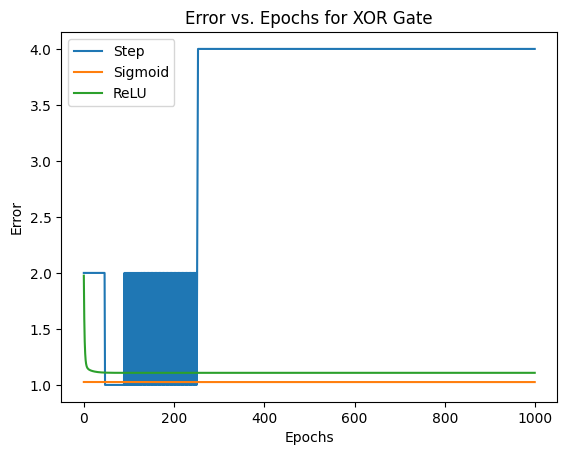

Iterations for Step: 1000
Iterations for Sigmoid: 1000
Iterations for ReLU: 1000


In [ ]:
# Activation functions
def step_activation(x):
    return 1 if x >= 0 else 0

def sigmoid_activation(x):
    return 1 / (1 + np.exp(-x))

def relu_activation(x):
    return max(0, x)

# Perceptron output calculation
def perceptron_output(weights, inputs, activation_fn):
    output = sum(w * x for w, x in zip(weights, inputs))
    return activation_fn(output)

# XOR gate training data
training_data = [
    (0, 0, 0),
    (0, 1, 1),
    (1, 0, 1),
    (1, 1, 0)
]

def train_perceptron(initial_weights, learning_rate=0.05, convergence_error=0.002, max_epochs=1000, activation_fn=step_activation):
    # Initialize weights
    weights = initial_weights

    # Training loop
    epochs = 0
    errors = []

    while True:
        epoch_error = 0
        for x1, x2, target in training_data:
            inputs = [1, x1, x2]  # Add bias term
            output = perceptron_output(weights, inputs, activation_fn)
            error = target - output
            epoch_error += error ** 2

            # Weight updates
            for i in range(len(weights)):
                weights[i] += learning_rate * error * inputs[i]

        errors.append(epoch_error)
        epochs += 1

        if epoch_error <= convergence_error or epochs >= max_epochs:
            break

    return epochs, weights, errors

# Initial weights
initial_weights = [10, 0.2, -0.75]

# Train the perceptron for XOR gate with different activation functions
activation_functions = [step_activation, sigmoid_activation, relu_activation]
activation_names = ['Step', 'Sigmoid', 'ReLU']
iterations = []

for activation_fn, activation_name in zip(activation_functions, activation_names):
    num_epochs, final_weights, error_history = train_perceptron(initial_weights, activation_fn=activation_fn)
    iterations.append(num_epochs)

    # Plotting epochs against error values
    plt.plot(range(num_epochs), error_history, label=activation_name)

plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs for XOR Gate')
plt.legend(activation_names)
plt.show()

# Compare the number of iterations taken to converge
for i, activation_name in enumerate(activation_names):
    print(f"Iterations for {activation_name}: {iterations[i]}")


A3 using XOR gate logic

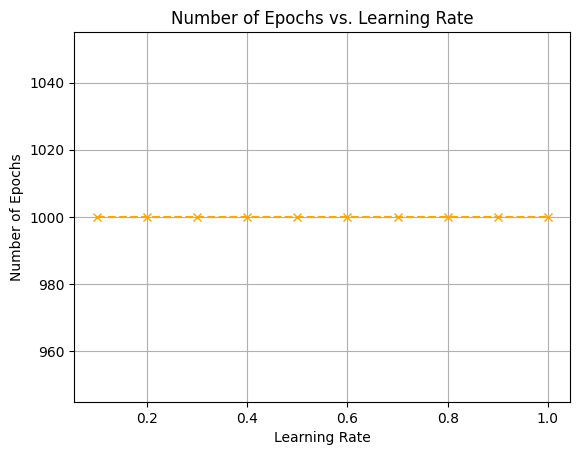

In [ ]:
def step_activation(x):
    return 1 if x >= 0 else 0

def train_perceptron(initial_weights, learningRate=0.05, activation_func=step_activation, convergence_error=0.002, max_epochs=1000):
    W0, W1, W2 = initial_weights

    def perceptron_output(x1, x2):
        return W0 + W1 * x1 + W2 * x2

    #and gate logic
    training_data = [
        (0, 0, 0),
        (0, 1, 1),
        (1, 0, 1),
        (1, 1, 0)
    ]

    epochs = 0
    errors = []

    while True:
        epoch_error = 0
        for x1, x2, target in training_data:
            output = perceptron_output(x1, x2)
            error = target - activation_func(output)
            epoch_error = epoch_error + error ** 2
            W0 = W0 + learningRate * error
            W1 = W1 + learningRate * error * x1
            W2 = W2 + learningRate * error * x2

        errors.append(epoch_error)
        epochs += 1

        if epoch_error <= convergence_error or epochs >= max_epochs:
            break

    return epochs, [W0, W1, W2], errors

# Initial weights
initial_weights = [10, 0.2, -0.75]

# List of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# List to store the number of epochs for each learning rate
num_epochs_list = []

# Train the perceptron with varying learning rates
for learning_rate in learning_rates:
    num_epochs, final_weights, errors = train_perceptron(initial_weights, learningRate=learning_rate)
    num_epochs_list.append(num_epochs)

# Plotting learning rates vs. number of epochs
plt.plot(learning_rates, num_epochs_list, marker='x', linestyle='--', color='orange')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Epochs')
plt.title('Number of Epochs vs. Learning Rate')
plt.grid(True)
plt.show()

A5.

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Perceptron output calculation
def perceptron_output(weights, inputs, bias):
    weighted_sum = np.dot(weights, inputs) + bias
    return sigmoid(weighted_sum)

# Given customer data
data = {
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198]
}

# Convert data to a DataFrame
data = pd.DataFrame(data)

# Labels: High (1) or Low (0) value based on Payment
data['Label'] = [1 if payment >= 250 else 0 for payment in data['Payment']]

# Features and labels as NumPy arrays
features = data[['Candies', 'Mangoes', 'Milk Packets']].values.T  # Transpose the matrix
labels = data['Label'].values

# Initialize weights and bias with random values
np.random.seed(0)  # For reproducibility
num_features = features.shape[0]
weights = np.random.rand(num_features)
bias = np.random.rand()

# Learning rate
learning_rate = 0.01

# Training loop
num_epochs = 1000  # You can adjust this as needed
for epoch in range(num_epochs):
    total_error = 0
    for i in range(len(features.T)):
        # Forward pass
        input_data = features[:, i]
        predicted = perceptron_output(weights, input_data, bias)

        # Calculate error
        error = labels[i] - predicted
        total_error += abs(error)

        # Update weights and bias
        weights += learning_rate * error * input_data
        bias += learning_rate * error

    # Check for convergence
    if total_error == 0:
        break

# Evaluation
predictions = [perceptron_output(weights, input_data, bias) for input_data in features.T]
predicted_labels = [1 if prediction >= 0.5 else 0 for prediction in predictions]

# Add predicted labels to the DataFrame
data['Predicted Label'] = predicted_labels

# Display the data with predicted labels
print(data[['Customer', 'Payment', 'Label', 'Predicted Label']])


  Customer  Payment  Label  Predicted Label
0      C_1      386      1                1
1      C_2      289      1                1
2      C_3      393      1                1
3      C_4      110      0                0
4      C_5      280      1                1
5      C_6      167      0                0
6      C_7      271      1                1
7      C_8      274      1                1
8      C_9      148      0                0
9     C_10      198      0                0


A6. Compare the results obtained from above perceptron learning to the ones obtained with matrix pseudo-inverse

In [ ]:
# Define the dataset
data = {
    'Customer': ['C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7', 'C_8', 'C_9', 'C_10'],
    'Candies': [20, 16, 27, 19, 24, 22, 15, 18, 21, 16],
    'Mangoes': [6, 3, 6, 1, 4, 1, 4, 4, 1, 2],
    'Milk Packets': [2, 6, 2, 2, 2, 5, 2, 2, 4, 4],
    'Payment': [386, 289, 393, 110, 280, 167, 271, 274, 148, 198]
}

# Convert data to a pandas DataFrame
df = pd.DataFrame(data)

# Convert data to a NumPy array
X = df[['Candies', 'Mangoes', 'Milk Packets']].values
y = np.array([1 if payment >= 250 else 0 for payment in df['Payment']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a perceptron model
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predictions using perceptron
y_train_pred_perceptron = perceptron.predict(X_train)
y_test_pred_perceptron = perceptron.predict(X_test)

# Train a model using matrix pseudo-inverse
# Calculate weights using the pseudo-inverse
weights_pseudo_inverse = np.linalg.pinv(X_train).dot(y_train)

# Predictions using pseudo-inverse
y_train_pred_pseudo_inverse = (X_train.dot(weights_pseudo_inverse) >= 0.5).astype(int)
y_test_pred_pseudo_inverse = (X_test.dot(weights_pseudo_inverse) >= 0.5).astype(int)

# Evaluate both models
accuracy_perceptron_train = accuracy_score(y_train, y_train_pred_perceptron)
accuracy_perceptron_test = accuracy_score(y_test, y_test_pred_perceptron)

accuracy_pseudo_inverse_train = accuracy_score(y_train, y_train_pred_pseudo_inverse)
accuracy_pseudo_inverse_test = accuracy_score(y_test, y_test_pred_pseudo_inverse)

print("Perceptron Accuracy (Train):", accuracy_perceptron_train)
print("Perceptron Accuracy (Test):", accuracy_perceptron_test)
print("Matrix Pseudo-Inverse Accuracy (Train):", accuracy_pseudo_inverse_train)
print("Matrix Pseudo-Inverse Accuracy (Test):", accuracy_pseudo_inverse_test)


Perceptron Accuracy (Train): 1.0
Perceptron Accuracy (Test): 0.5
Matrix Pseudo-Inverse Accuracy (Train): 1.0
Matrix Pseudo-Inverse Accuracy (Test): 0.5


A7. Develop the belowNeural Network. Use learning rate (α) = 0.05 with a Sigmoid activation function. Learn the weights of the network using back-propagation algorithm to implement above provided AND gate logic

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  #inputs of an AND gate
y = np.array([[0], [0], [0], [1]])  #outputs of an AND gate

# Neural network architecture [Given in the problem]
input_nodes = 2
hidden_nodes = 2
output_nodes = 1

# Initialize weights and biases with random values
np.random.seed(0)   #random number generator in python
weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
biases_hidden = np.zeros((1, hidden_nodes))

weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))
biases_output = np.zeros((1, output_nodes))

# Learning rate
learning_rate = 0.05

# Maximum number of iterations
max_iterations = 1000

# Convergence error threshold
convergence_error_threshold = 0.002

# Training loop
for iteration in range(max_iterations):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - output_layer_output

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error_threshold:
        print(f"Converged after {iteration} iterations")
        break

    # Backward pass
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output = weights_hidden_output + hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden = weights_input_hidden + X.T.dot(d_hidden) * learning_rate

    biases_output = biases_output + np.sum(d_output, axis=0, keepdims=True) * learning_rate
    biases_hidden = biases_hidden + np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Evaluate the trained network
predictions = sigmoid(np.dot(sigmoid(np.dot(X, weights_input_hidden) + biases_hidden), weights_hidden_output) + biases_output)
print("Predictions:")
print(predictions)


Predictions:
[[0.23327416]
 [0.29609331]
 [0.30368578]
 [0.36311458]]


A8. Repeat the above A1 experiment for XOR Gate logic. Keep the learning rate & activation function same as A1.

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  #inputs of XOR gate
y = np.array([[0], [1], [1], [0]])  #outputs of XOR gate

# Neural network architecture [Given in the problem]
input_nodes = 2
hidden_nodes = 2
output_nodes = 1

# Initialize weights and biases with random values
np.random.seed(0)   #random number generator in python
weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
biases_hidden = np.zeros((1, hidden_nodes))

weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))
biases_output = np.zeros((1, output_nodes))

# Learning rate
learning_rate = 0.05

# Maximum number of iterations
max_iterations = 1000

# Convergence error threshold
convergence_error_threshold = 0.002

# Training loop
for iteration in range(max_iterations):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - output_layer_output

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error_threshold:
        print(f"Converged after {iteration} iterations")
        break

    # Backward pass
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output = weights_hidden_output + hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden = weights_input_hidden + X.T.dot(d_hidden) * learning_rate

    biases_output = biases_output + np.sum(d_output, axis=0, keepdims=True) * learning_rate
    #keepdims: a parameter that you can pass to various functions to control whether the dimensions of the result should be kept or reduced.
    biases_hidden = biases_hidden + np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Evaluate the trained network
predictions = sigmoid(np.dot(sigmoid(np.dot(X, weights_input_hidden) + biases_hidden), weights_hidden_output) + biases_output)
print("Predictions:")
print(predictions)


Predictions:
[[0.47544663]
 [0.50272827]
 [0.50556324]
 [0.52649632]]


A9. Repeat exercise A1 & A2 with 2 output nodes (as shown below). A zero output of logic gate maps to [O1O2] = [1 0] from output layer while a one output from logic gate maps to [0 1]. AND Gate

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# AND gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  #inputs of AND gate
y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])   #outputs of AND gate

# Neural network architecture [Given in the problem]
input_nodes = 2
hidden_nodes = 2
output_nodes = 2

# Initialize weights and biases with random values
np.random.seed(0)   #random number generator in python
weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
biases_hidden = np.zeros((1, hidden_nodes))

weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))
biases_output = np.zeros((1, output_nodes))

# Learning rate
learning_rate = 0.05

# Maximum number of iterations
max_iterations = 1000

# Convergence error threshold
convergence_error_threshold = 0.002

# Training loop
for iteration in range(max_iterations):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - output_layer_output

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error_threshold:
        print(f"Converged after {iteration} iterations")
        break

    # Backward pass
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output = weights_hidden_output + hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden = weights_input_hidden + X.T.dot(d_hidden) * learning_rate

    biases_output = biases_output + np.sum(d_output, axis=0, keepdims=True) * learning_rate
    #keepdims: a parameter that you can pass to various functions to control whether the dimensions of the result should be kept or reduced.
    biases_hidden = biases_hidden + np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Evaluate the trained network
predictions = sigmoid(np.dot(sigmoid(np.dot(X, weights_input_hidden) + biases_hidden), weights_hidden_output) + biases_output)
print("Predictions:")
print(predictions)


Predictions:
[[0.73341184 0.23289031]
 [0.72086012 0.2929836 ]
 [0.71829714 0.30085794]
 [0.70764963 0.35833452]]


XOR Gate

In [ ]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# XOR gate training data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  #inputs of XOR gate
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])   #outputs of XOR gate

# Neural network architecture [Given in the problem]
input_nodes = 2
hidden_nodes = 2
output_nodes = 2

# Initialize weights and biases with random values
np.random.seed(0)   #random number generator in python
weights_input_hidden = np.random.uniform(size=(input_nodes, hidden_nodes))
biases_hidden = np.zeros((1, hidden_nodes))

weights_hidden_output = np.random.uniform(size=(hidden_nodes, output_nodes))
biases_output = np.zeros((1, output_nodes))

# Learning rate
learning_rate = 0.05

# Maximum number of iterations
max_iterations = 1000

# Convergence error threshold
convergence_error_threshold = 0.002

# Training loop
for iteration in range(max_iterations):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + biases_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + biases_output
    output_layer_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - output_layer_output

    # Check for convergence
    if np.mean(np.abs(error)) <= convergence_error_threshold:
        print(f"Converged after {iteration} iterations")
        break

    # Backward pass
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = d_output.dot(weights_hidden_output.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output = weights_hidden_output + hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden = weights_input_hidden + X.T.dot(d_hidden) * learning_rate

    biases_output = biases_output + np.sum(d_output, axis=0, keepdims=True) * learning_rate #keepdims: a parameter that you can pass to various functions to control whether the dimensions of the result should be kept or reduced.
    biases_hidden = biases_hidden + np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# Evaluate the trained network
predictions = sigmoid(np.dot(sigmoid(np.dot(X, weights_input_hidden) + biases_hidden), weights_hidden_output) + biases_output)
print("Predictions:")
print(predictions)


Predictions:
[[0.48741224 0.46977702]
 [0.49773916 0.50128228]
 [0.49821744 0.50484499]
 [0.50697855 0.5310057 ]]


A10. Learn using a MLP network from Sci-Kit manual available at https://scikit-learn.org/stable/modules/neural_networks_supervised.html. Repeat the AND Gate and XOR Gate exercises using MLPClassifier() function.

In [ ]:
#defining AND gate training data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])

#creating MLPClassifier
classiAND = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs',max_iter=1000)

#training the classifier
classiAND.fit(X,y)

#test the classifier
testData = np.array([[0,0],[0,1],[1,0],[1,1]])
predictions = classiAND.predict(testData)

#printing the result
print("AND gate Predictions: ")
print(predictions)

AND gate Predictions: 
[0 0 0 1]


A11.  Use the MLPClassifier() function on your project dataset.

In [ ]:
import pandas as pd
data = pd.read_excel(r"/content/embeddingsdata.xlsx")
df = pd.DataFrame(data)
#df
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.0
